In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = r"C:\Users\Lenovo\Documents\Data"
sales = pd.read_csv(data + "\\SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [6]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [7]:
sales.isnull().sum()


AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart


In [8]:
reg_sales = round(sales.groupby('Region')[['Sales2015','Sales2016']].sum(),2)
reg_sales

,Sales2015,Sales2016
Region,,
Central,7891728.86,9787808.73
East,9512916.49,12667230.45
West,5349744.64,7209689.43


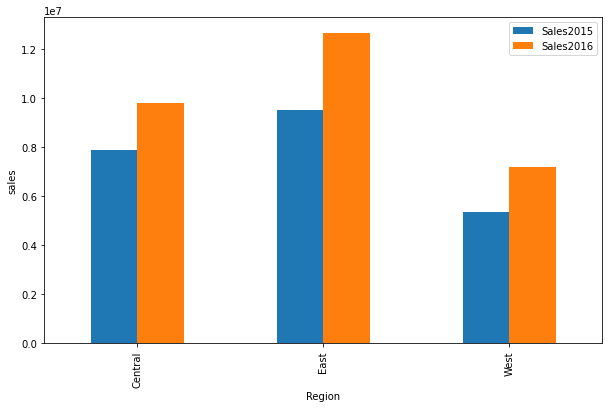

In [9]:
reg_sales.plot(kind = 'bar', figsize = (10,6) )
plt.ylabel('sales')
plt.show()

In [10]:
print('The sales in year 2016 is more as compare to the sale in year 2015') 
print('and the Region East has more sales in both the year as compare to other regions.')

The sales in year 2016 is more as compare to the sale in year 2015
and the Region East has more sales in both the year as compare to other regions.


### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [14]:
reg_sale2016 = sales.groupby('Region')[['Sales2016']].sum()
reg_sale2016

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


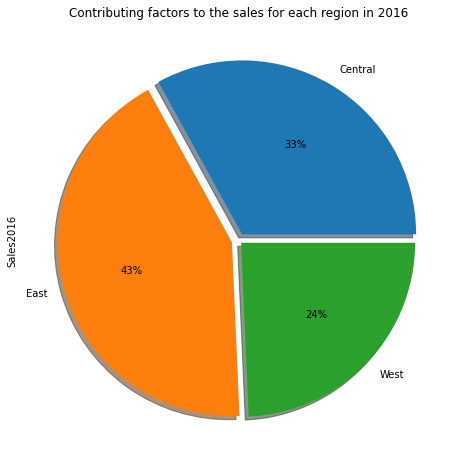

In [15]:
reg_sale2016.plot(kind ='pie', subplots=True , legend =False , autopct="%1.0f%%" ,
                  shadow = True,figsize =(8,8) ,explode=[0.04,0.04,0.02])
plt.title('Contributing factors to the sales for each region in 2016')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [16]:
reg_tier = sales.groupby(['Region','Tier'])[['Sales2015', 'Sales2016']].sum()
reg_tier

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

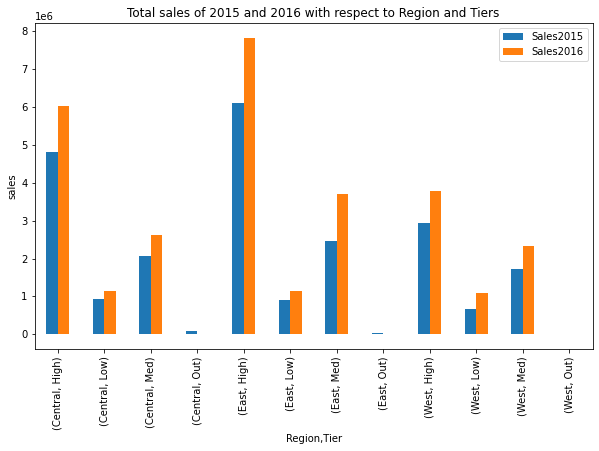

In [17]:
reg_tier.plot(kind = 'bar' , figsize = (10,6))
plt.ylabel('sales')
plt.title('Total sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?


In [18]:
reg = sales.groupby(['Region','State'])[['Sales2015', 'Sales2016']].sum()
east_sales = reg.loc['East']
east_sales

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


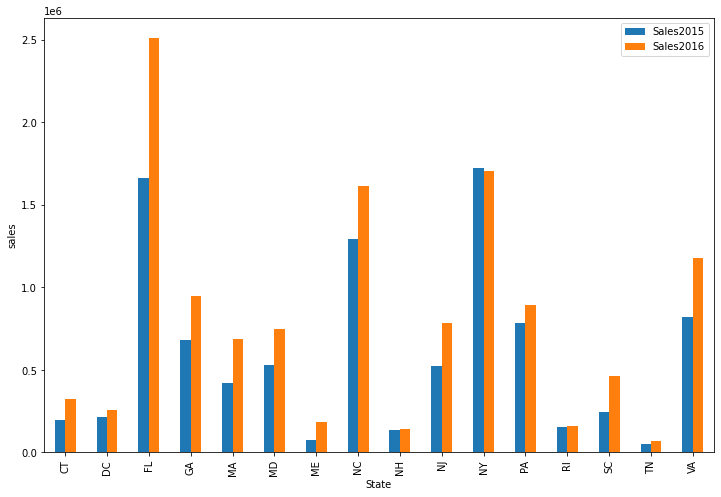

In [19]:
east_sales.plot(kind = 'bar', figsize = (12,8))
plt.ylabel('sales')
plt.show()

In [20]:
print('In NY the sales has been decline in year 2016 as compare to 2015')


In NY the sales has been decline in year 2016 as compare to 2015


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [21]:
tier_div = sales.groupby(['Tier', 'Division'])[['Units2015','Units2016']].sum()
H_tier_div = tier_div.loc['High']
H_tier_div.head(2)

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999


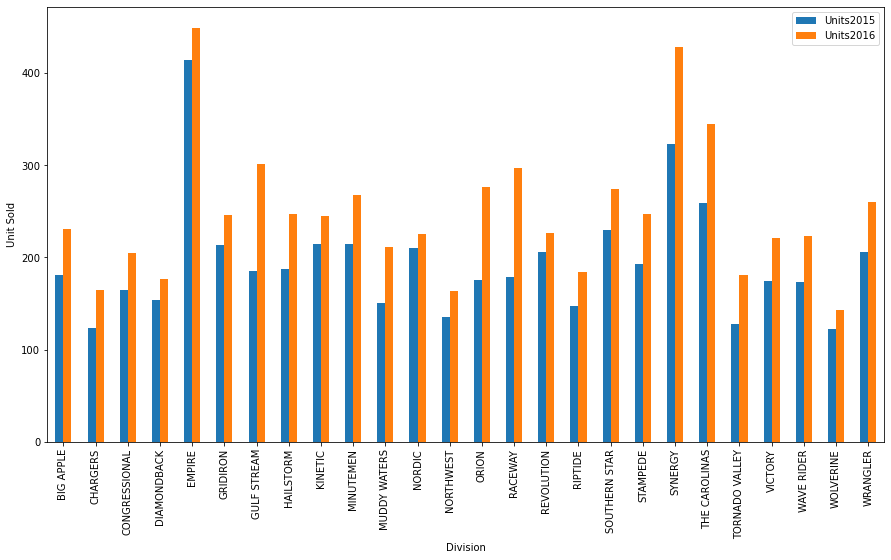

In [22]:
H_tier_div.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Unit Sold')
plt.show()

In [23]:
print('No division show decline in number of units sold in 2016 compared to 2015 in High Tier')


No division show decline in number of units sold in 2016 compared to 2015 in High Tier


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset.

In [24]:
def Qtr (x):
    if x.Month in ['Jan','Feb', 'Mar' ] :
        return 'Q1'
    elif x.Month in ['Apr','May', 'Jun' ] :
        return 'Q2'
    elif x.Month in ['Jul','Aug', 'Sep' ] :
        return 'Q3'
    else :
        return 'Q4'

In [25]:
sales['Qtr']= sales.apply(Qtr, axis =1)
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [26]:
Qtr_sales = sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()
Qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


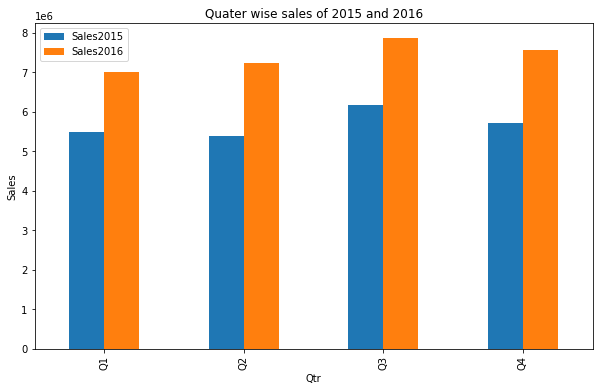

In [27]:
Qtr_sales.plot(kind ='bar' , figsize =(10,6))
plt.ylabel('Sales')
plt.title('Quater wise sales of 2015 and 2016')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [28]:
Qtr_tier = abs(pd.pivot_table(sales , index='Tier' , columns= 'Qtr' , values= 'Sales2016' , aggfunc='sum'))
Qtr_tier

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867718.595,4.130953e+06,4.872559e+06,4.740002e+06
Low,948832.770,8.905948e+05,7.951777e+05,7.426594e+05
Med,2181401.879,2.215814e+06,2.197058e+06,2.085207e+06
Out,0.000,0.000000e+00,3.248530e+03,0.000000e+00


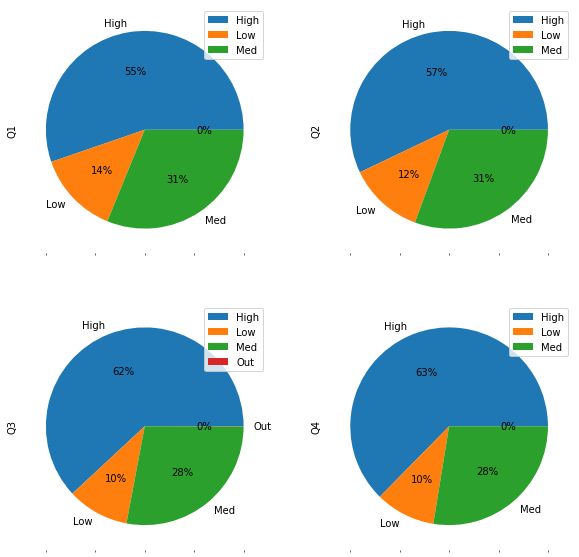

In [29]:
Qtr_tier.plot(kind='pie', subplots = True ,autopct="%1.0f%%" , figsize = (10,10), layout=(2, 2))
plt.show()